# Introduction

For this assignment I will be using the dataset from kaggle called 'IBM HR Analytics Employee Attrition & Performance'. This dataset inlcudes information about employees and their attrition and performance along with information such as background information of the employees and current information at the job.


## Data cleaning

describe any data cleaning steps

In [2]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


* When looking at the dataset, I will drop a few columns that i believe are not very important for the prediction of attrition. I will be doing that with .drop()
Before I am able to decide to drop a column I will count values of a few columns to get better insights.

In [5]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [6]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [7]:
df['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

* Eventually I decided to delete the following columns:

In [8]:
df = df.drop(columns= ['DailyRate', 'EmployeeCount', 'EmployeeNumber', 'Gender', 'MaritalStatus', 'BusinessTravel', 'DistanceFromHome', 'Education', 'EducationField'], axis=1)
df.head()

,Age,Attrition,Department,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,2,94,3,2,Sales Executive,4,5993,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Research & Development,3,61,2,2,Research Scientist,2,5130,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Research & Development,4,92,2,1,Laboratory Technician,3,2090,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Research & Development,4,56,3,1,Research Scientist,3,2909,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Research & Development,1,40,3,1,Laboratory Technician,2,3468,...,4,80,1,6,3,3,2,2,2,2


* After deleting the columns the dataset looks like this:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   Department                1470 non-null   object
 3   EnvironmentSatisfaction   1470 non-null   int64 
 4   HourlyRate                1470 non-null   int64 
 5   JobInvolvement            1470 non-null   int64 
 6   JobLevel                  1470 non-null   int64 
 7   JobRole                   1470 non-null   object
 8   JobSatisfaction           1470 non-null   int64 
 9   MonthlyIncome             1470 non-null   int64 
 10  MonthlyRate               1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  Over18                    1470 non-null   object
 13  OverTime                  1470 non-null   object
 14  PercentSalaryHike       

* There is no need for using drop NaN since all columns consist of the same amount of rows.

## Exploratory data analysis 

present relevant grahs and tables with respect to your problem

* First I will be looking at the attrition in combination with employee's ages.

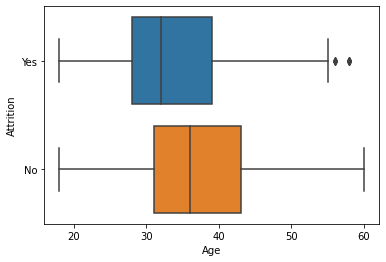

In [10]:
sns.boxplot(x='Age', y='Attrition', data=df)
plt.show()

* What we can see from the boxplot is that the ages are relatively the same however what we can conclude fro this plot is that younger people are more likely to have attrition. This is also shwon by the low numbers around the age of 60.

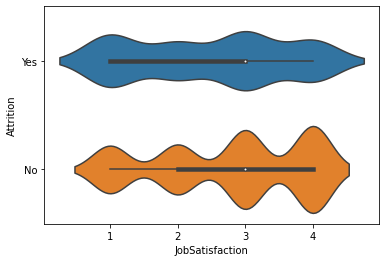

In [11]:
sns.violinplot(x='JobSatisfaction', y='Attrition', data=df)
plt.show()

When looking at the violonplot we can see that a lot of employees with no attrition rate their job satisfaction as 'very high'. The employees with attrition are more devided but more on the 'low', 'medium' and 'high'.

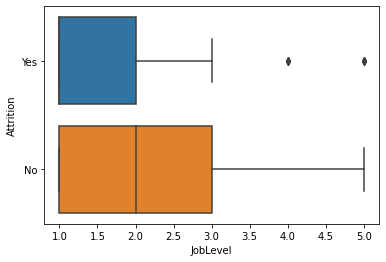

In [13]:
sns.boxplot(x='JobLevel', y='Attrition', data=df)
plt.show()

When looking at the boxplot above, we can see that most attrition happens at lower joblevels. With just a few attritions at a  high level